# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [215]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [216]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


In [217]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   float64
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 129.9+ KB


In [218]:
city_types = pyber_data_df["type"].unique()
city_types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [219]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

## Deliverable 1: Get a Summary DataFrame 

In [220]:
#  1. Get the total rides for each city type

total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [221]:
# 2. Get the total drivers for each city type

total_drivers2 = city_data_df.groupby(["type"]).sum()["driver_count"]

total_drivers2

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [222]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [223]:
#  4. Get the average fare per ride for each city type.

average_fare_per_ride = pyber_data_df.groupby(["type"]).mean()["fare"]

average_fare_per_ride


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [224]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares / total_drivers2

average_fare_per_driver




type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [225]:
#  6. Create a PyBer summary DataFrame. 


pyber_summary_df = pd.DataFrame(
        {"Total Rides": total_rides,
         "Total Drivers": total_drivers2,
         "Total Fares": total_fares,
         "Average Fare per Ride": average_fare_per_ride,
         "Average Fare per Driver": average_fare_per_driver})



pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [226]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [227]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [228]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


In [229]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_sum = pyber_data_df.groupby(["date", "type"]).sum()["fare"]

fare_sum.head()

date              type    
2019-01-01 0:08   Urban       37.91
2019-01-01 0:46   Suburban    47.74
2019-01-01 12:32  Suburban    25.56
2019-01-01 14:40  Urban        5.42
2019-01-01 14:42  Urban       12.31
Name: fare, dtype: float64

In [230]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_sum = fare_sum_df.reset_index()
fare_sum.head()

,index,date,type,fare
0,0,2019-01-01 0:08,Urban,37.91
1,1,2019-01-01 0:46,Suburban,47.74
2,2,2019-01-01 12:32,Suburban,25.56
3,3,2019-01-01 14:40,Urban,5.42
4,4,2019-01-01 14:42,Urban,12.31


In [231]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_fares_pivot = fare_sum.pivot(index="date", columns="type", values="fare")
date_fares_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31


In [232]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
given_dates = date_fares_pivot.loc['2019-01-01':'2019-04-29']

given_dates.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31


In [233]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
given_dates.index = pd.to_datetime(given_dates.index)

In [234]:
# 7. Check that the datatype for the index is datetime using df.info()
given_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [235]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_dates = given_dates.resample('W').sum()

weekly_dates.head(10)                 

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


Text(0, 0.5, 'Fare($USD)')

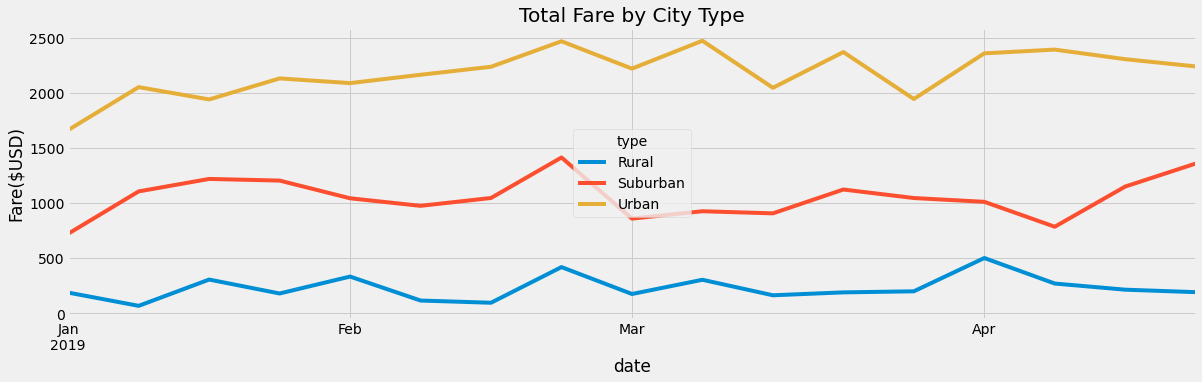

In [236]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_dates = weekly_dates.plot(figsize = (18,5))
weekly_dates.set_title("Total Fare by City Type")
weekly_dates.set_ylabel("Fare($USD)")

